# p1 vs p2 figures

Three figures are planned for the appendices

1. Timeseries. These would show tas global mean in the 1pctCO2 simulation in p1 and p2 model versions. Also maybe NH September sea-ice extent, volume mean ocean potential temperature, thetao, and global mean ocean CO2 flux, fgco2. Other variables perhaps to be added.
2. Climatologies. Maps of (left) tas, pr, tauuo, and sea-water vertical velocity, wo at 100 m in p1; and (right) these variables but p1 minus p2.
3. As in 2. above, except that all fields are the 1911 to 1930 mean minus the 1850 to 1870 mean from the 1pctCO2 simulations of p1 and p2.

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc4
import xarray as xr
import scipy as sp
from scipy import stats
import os
from dask.diagnostics import ProgressBar

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
%store -r kg_per_Pg
%store -r seconds_per_day
%store -r days_per_year

In [3]:
#grids
areacella = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/r1i1p1f1/fx/areacella/gn/v20190429/areacella_fx_CanESM5_1pctCO2_r1i1p1f1_gn.nc')
areacello = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Ofx/areacello/gn/v20190429/areacello_Ofx_CanESM5_piControl_r1i1p1f1_gn.nc')
volcello = xr.open_dataset('processed_data/volcello_Ofx_CanESM5_piControl_r1i1p1f1_gn.nc')['volcello']
mesh_mask = xr.open_dataset('processed_data/nemo_mesh_mask.nc')

In [8]:
#tas
tas_dict = {}
for rel in ['r1','r2','r3']:
    tas_p1 = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/'+ rel +'i1p1f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_1pctCO2_'+ rel +'i1p1f1_gn_185001-200012.nc')
    tas_p2 = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/'+ rel +'i1p2f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_1pctCO2_'+ rel +'i1p2f1_gn_185001-200012.nc')

    p1_gmean = ((areacella['areacella']*tas_p1['tas']).sum(dim=['lat', 'lon']) / areacella['areacella'].sum()).resample(time='A').mean()
    p2_gmean = ((areacella['areacella']*tas_p2['tas']).sum(dim=['lat', 'lon']) / areacella['areacella'].sum()).resample(time='A').mean()

    tas_dict[rel] = {'p1_gmean':p1_gmean,'p2_gmean':p2_gmean}

tas_p1_rels = xr.concat([tas_dict[rel]['p1_gmean'] for rel in tas_dict], dim='realization')
tas_p1_rgmean = tas_p1_rels.mean('realization')

tas_p2_rels = xr.concat([tas_dict[rel]['p2_gmean'] for rel in tas_dict], dim='realization')
tas_p2_rgmean = tas_p2_rels.mean('realization')

In [9]:
#rtmt
rtmt_dict = {}
for rel in ['r1','r2','r3']:
    rtmt_p1 = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/'+ rel +'i1p1f1/Amon/rtmt/gn/v20190429/rtmt_Amon_CanESM5_1pctCO2_'+ rel +'i1p1f1_gn_185001-200012.nc')
    rtmt_p2 = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/'+ rel +'i1p2f1/Amon/rtmt/gn/v20190429/rtmt_Amon_CanESM5_1pctCO2_'+ rel +'i1p2f1_gn_185001-200012.nc')

    p1_gmean = ((areacella['areacella']*rtmt_p1['rtmt']).sum(dim=['lat', 'lon']) / areacella['areacella'].sum()).resample(time='A').mean()
    p2_gmean = ((areacella['areacella']*rtmt_p2['rtmt']).sum(dim=['lat', 'lon']) / areacella['areacella'].sum()).resample(time='A').mean()
    
    rtmt_dict[rel] = {'p1_gmean':p1_gmean,'p2_gmean':p2_gmean}

rtmt_p1_rels = xr.concat([rtmt_dict[rel]['p1_gmean'] for rel in rtmt_dict], dim='realization')
rtmt_p1_rgmean = rtmt_p1_rels.mean('realization')

rtmt_p2_rels = xr.concat([rtmt_dict[rel]['p2_gmean'] for rel in rtmt_dict], dim='realization')
rtmt_p2_rgmean = rtmt_p2_rels.mean('realization')


In [10]:
#fgco2
fgco2_dict = {}
for rel in ['r1','r2','r3']:
    fgco2_p1 = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/'+ rel +'i1p1f1/Omon/fgco2/gn/v20190429/fgco2_Omon_CanESM5_1pctCO2_'+ rel +'i1p1f1_gn_185001-200012.nc')
    fgco2_p2 = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/'+ rel +'i1p2f1/Omon/fgco2/gn/v20190429/fgco2_Omon_CanESM5_1pctCO2_'+ rel +'i1p2f1_gn_185001-200012.nc')

    p1_gmean =((fgco2_p1.fgco2*areacello.areacello).sum(dim=['j', 'i']).resample(time='A').mean()*seconds_per_day*days_per_year/kg_per_Pg)
    p2_gmean =((fgco2_p2.fgco2*areacello.areacello).sum(dim=['j', 'i']).resample(time='A').mean()*seconds_per_day*days_per_year/kg_per_Pg)
    
    fgco2_dict[rel] = {'p1_gmean':p1_gmean,'p2_gmean':p2_gmean}
    
fgco2_p1_rels = xr.concat([fgco2_dict[rel]['p1_gmean'] for rel in fgco2_dict], dim='realization')
fgco2_p1_rgmean = fgco2_p1_rels.mean('realization')

fgco2_p2_rels = xr.concat([fgco2_dict[rel]['p2_gmean'] for rel in fgco2_dict], dim='realization')
fgco2_p2_rgmean = fgco2_p2_rels.mean('realization')


In [ ]:
#thetao
compute=False
if compute:
    for rel in ['r1','r2','r3']:
        print(rel)
        #thetao_p1 = xr.open_mfdataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/'+ rel +'i1p1f1/Omon/thetao/gn/v20190429/thetao_Omon_CanESM5_1pctCO2_'+ rel +'i1p1f1_gn_*.nc')
        thetao_p2 = xr.open_mfdataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/'+ rel +'i1p2f1/Omon/thetao/gn/v20190429/thetao_Omon_CanESM5_1pctCO2_'+ rel +'i1p2f1_gn_*.nc')

        #o1=thetao_p1['thetao'].resample(time='A').mean(dim='time').to_netcdf('processed_data/ym_thetao_Omon_CanESM5_1pctCO2_'+ rel +'i1p1f1.nc', compute=False, mode='w')
        o2=thetao_p2['thetao'].resample(time='A').mean(dim='time').to_netcdf('processed_data/ym_thetao_Omon_CanESM5_1pctCO2_'+ rel +'i1p2f1.nc', compute=False, mode='w')

        with ProgressBar():
            #results = o1.compute()
            results = o2.compute()

compute=False
if compute:
    tvol=volcello.sum(dim=['j', 'i', 'lev'])
    for rel in ['r1','r2','r3']:
        thetao_p1_ym = xr.open_dataset('processed_data/ym_thetao_Omon_CanESM5_1pctCO2_'+ rel +'i1p1f1.nc')
        thetao_p2_ym = xr.open_dataset('processed_data/ym_thetao_Omon_CanESM5_1pctCO2_'+ rel +'i1p2f1.nc')
        
        thetao_p1_gmean = (thetao_p1_ym * volcello).sum(dim=['j', 'i', 'lev'])/tvol
        thetao_p2_gmean = (thetao_p2_ym * volcello).sum(dim=['j', 'i', 'lev'])/tvol

        o1=thetao_p1_gmean.to_netcdf('processed_data/gm_thetao_Omon_CanESM5_1pctCO2_'+ rel +'i1p1f1.nc', compute=False, mode='w')
        o2=thetao_p2_gmean.to_netcdf('processed_data/gm_thetao_Omon_CanESM5_1pctCO2_'+ rel +'i1p2f1.nc', compute=False, mode='w')
    
        with ProgressBar():
            results = o1.compute()
            results = o2.compute()

In [ ]:
#thetao cont
thetao_p1_list = []
for file in ['processed_data/gm_thetao_Omon_CanESM5_1pctCO2_r1i1p1f1.nc',
             'processed_data/gm_thetao_Omon_CanESM5_1pctCO2_r2i1p1f1.nc',
             'processed_data/gm_thetao_Omon_CanESM5_1pctCO2_r3i1p1f1.nc']:
    ds = xr.open_dataset(file)
    thetao_p1_list.append(ds)  
thetao_p1_rels = xr.concat([rel for rel in thetao_p1_list], dim='realization')
thetao_p1_rgmean = thetao_p1_rels.mean('realization')

thetao_p2_list = []
for file in ['processed_data/gm_thetao_Omon_CanESM5_1pctCO2_r1i1p2f1.nc',
             'processed_data/gm_thetao_Omon_CanESM5_1pctCO2_r2i1p2f1.nc',
             'processed_data/gm_thetao_Omon_CanESM5_1pctCO2_r3i1p2f1.nc']:
    ds = xr.open_dataset(file)
    thetao_p2_list.append(ds)   
thetao_p2_rels = xr.concat([rel for rel in thetao_p2_list], dim='realization')
thetao_p2_rgmean = thetao_p2_rels.mean('realization')

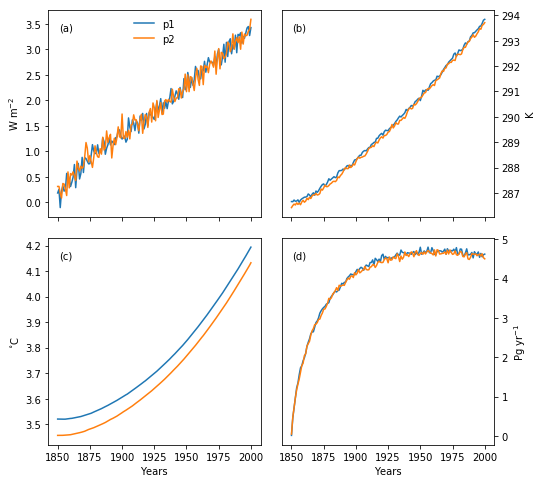

In [13]:
#plotting
fig, ((axtl, axtr),(axbl, axbr)) = plt.subplots(2,2, figsize=(8,8))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
years = fgco2_p1_rgmean.time.dt.year

axtl.plot(years, rtmt_p1_rgmean, label='p1')
axtl.plot(years, rtmt_p2_rgmean, label='p2')
axtl.legend(frameon=False, loc='upper center')

axtr.plot(tas_p1_rgmean)
axtr.plot(tas_p2_rgmean)

axbl.plot(years, thetao_p1_rgmean['thetao'])
axbl.plot(years, thetao_p2_rgmean['thetao'])

axbr.plot(years, fgco2_p1_rgmean)
axbr.plot(years, fgco2_p2_rgmean)

axtl.set_ylabel(r'W m$^{-2}$')
axtr.set_ylabel(r'K')
axbl.set_ylabel(r'$^{\circ}$C')
axbr.set_ylabel('Pg yr$^{-1}$')

for ax,l in zip([axtl, axtr, axbl, axbr], ['(a)', '(b)', '(c)', '(d)']):
    ax.text(0.05, 0.9, l, transform=ax.transAxes)

for ax in [axtr, axbr]:
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")

for ax in [axtr, axtl]:
    #ax.xaxis.set_tick_params(labelbottom=labelx)
    ax.xaxis.set_tick_params(labelbottom=False)

for ax in [axbl, axbr]:
    ax.set_xlabel('Years')
    xt = ax.get_xticklabels()

    
plt.savefig('plots/fig-E3_p1_vs_p2_timeseries_r1-3.png', bbox_inches='tight')
plt.savefig('plots/fig-E3_p1_vs_p2_timeseries_r1-3.pdf', bbox_inches='tight')